# Dimension Reduction

<center><img src="https://cdn-images-1.medium.com/max/1500/0*ZyCDEzg4usuY6LdC" alt="Drawing" style="width: 700px; height: 400px;" /></center>

<div style="text-align: right"> 
  <small>medium.com</small>
</div>


© 2023 [University of Illinois at Chicago](https://www.uic.edu/). All rights reserved.

## Learning Objectives


- [What Is Dimension Reduction](#What-Is-Dimension-Reduction)
- [Dimension Reduction with PCA](#Dimension-Reduction-with-PCA)
- [PCA Implementation with Scikit Learn](#PCA-Implementation-with-Scikit-Learn)
- [Other Dimension Reduction Techniques](#Other-Dimension-Reduction-Techniques)


## What Is Dimension Reduction

Dimension reduction simplifies complex datasets by reducing variables, enhancing computational efficiency, and improving machine learning, with techniques like PCA preserving essential information while eliminating redundancy. This helps machine learning algorithms extact an dlearn useful information from the dataset for efficiently making theri performance better.



<center><img src="https://teamraft.com/assets/images/featimage/jan_04_2019.png" alt="Drawing" style="width: 350px; height: 350px;" /></center>

<div style="text-align: right"> 
  <small>teamraft.com</small>
</div>


There are many different kinds of dimension reduction techniques available, based on implemented methods such as Principal Component Analysis (PCA), t-SNE (t-Distributed Stochastic Neighbor Embedding), Linear Discriminant Analysis (LDA), UMAP (Uniform Manifold Approximation and Projection), and Autoencoders, among others.

## Dimension Reduction with PCA

Principal Component Analysis (PCA) is a powerful technique for dimension reduction in data analysis and machine learning. PCA simplifies high-dimensional data by transforming it into a new coordinate system that maximizes variance and minimizes information loss. Using the explained variance ratio, we can determine how much variance in the data is captured by each dimension and how many dimensions are needed for a low-dimensional representation of the data.

**PCA Equations:**

The PCA process involves two main equations:

1. **Covariance Matrix**: Calculate the covariance matrix of the original data, denoted as Σ.
   
   $$\Sigma = \frac{1}{n}\sum_{i=1}^{n} (x_i - \bar{x})(x_i - \bar{x})^T$$

   Where $x_i$ represents data points, and $\bar{x}$ is the mean.

2. **Eigenvalue Decomposition**: Compute the eigenvectors and eigenvalues of the covariance matrix Σ to find the principal components (PCs).

   $$\Sigma v = \lambda v$$

   Here, $v$ represents the eigenvectors, and $\lambda$ represents the eigenvalues.

By selecting the top $k$ eigenvectors corresponding to the largest eigenvalues, you can reduce the dimensionality of your data from $n$ to $k$, capturing most of the data's variance. 

## PCA Implementation with Scikit Learn

#### Load the Dataset

In [1]:
import pandas as pd

data =  pd.read_csv('band_Gap.csv')

data.head(5)

,Number,MendeleevNumber,AtomicWeight,MeltingT,Column,Row,CovalentRadius,Electronegativity,NsValence,NpValence,...,NsUnfilled,NpUnfilled,NdUnfilled,NfUnfilled,NUnfilled,GSvolume_pa,GSbandgap,GSmagmom,SpaceGroupNumber,band_gap
0,2.500000,89.500000,4.257630,26.270000,4.500000,1.250000,41.000000,2.410000,1.250000,0.750000,...,0.750000,0.750000,0.0,0.0,1.500000,8.653437,7.499000,0.0,194.000000,4.3412
1,10.000000,82.375000,20.369348,158.393750,15.000000,2.375000,84.500000,2.721250,2.000000,3.000000,...,0.000000,3.000000,0.0,0.0,3.000000,17.694308,4.632500,0.0,122.000000,3.5600
2,6.000000,61.750000,12.240275,160.710000,11.500000,2.000000,85.250000,2.525000,1.750000,2.250000,...,0.250000,2.250000,0.0,0.0,2.500000,15.224896,4.827750,0.0,202.750000,3.6643
3,9.333333,60.666667,18.701880,135.113333,6.000000,2.333333,100.000000,2.153333,1.333333,1.333333,...,0.666667,0.666667,0.0,0.0,1.333333,29.608889,2.617667,0.0,145.000000,3.6839
4,10.000000,84.000000,20.326621,145.050000,15.333333,2.333333,81.333333,2.890000,2.000000,3.333333,...,0.000000,2.666667,0.0,0.0,2.666667,15.481329,2.687333,0.0,69.333333,5.1829


In [2]:
data.columns

Index(['Number', 'MendeleevNumber', 'AtomicWeight', 'MeltingT', 'Column',
       'Row', 'CovalentRadius', 'Electronegativity', 'NsValence', 'NpValence',
       'NdValence', 'NfValence', 'NValence', 'NsUnfilled', 'NpUnfilled',
       'NdUnfilled', 'NfUnfilled', 'NUnfilled', 'GSvolume_pa', 'GSbandgap',
       'GSmagmom', 'SpaceGroupNumber', 'band_gap'],
      dtype='object')

In [5]:
X = data.iloc[:,:-1] #features
y  = data.iloc[:,-1] # target

### PCA

In [6]:
from sklearn.decomposition import PCA

In [16]:
pca = PCA(n_components=X.shape[1]-1)  # Specify the number of components you want to keep

In [17]:
X_pca = pca.fit_transform(X)  # X is your data matrix

In [18]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([9.89201898e-01, 5.90926748e-03, 3.93615389e-03, 6.66487123e-04,
       1.88281427e-04, 5.29967518e-05, 1.61240665e-05, 1.09428473e-05,
       6.25708652e-06, 5.01376020e-06, 2.82975436e-06, 1.60440745e-06,
       8.56508362e-07, 6.08489787e-07, 2.89937290e-07, 2.29273981e-07,
       7.08062103e-08, 5.30882974e-08, 3.10505262e-08, 3.78024008e-09,
       1.45832648e-36])

In [19]:
import matplotlib.pyplot as plt

Text(0.5, 0, '# of Dimension')

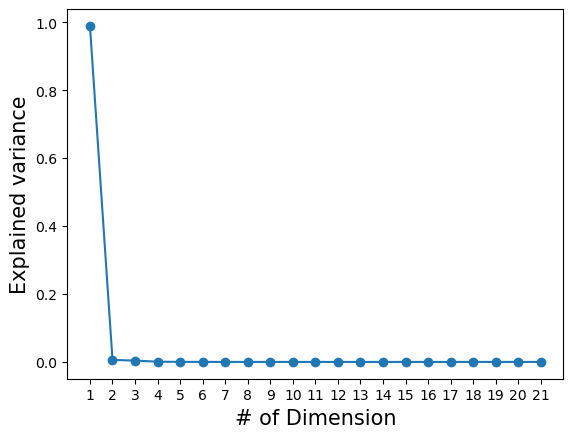

In [32]:
dimension = list(range(1,len(explained_variance)+1))

plt.plot(dimension,explained_variance, '-o')

ax = plt.gca()
ax.set_xticks(dimension)
ax.set_xticklabels(dimension)

plt.ylabel('Explained variance',size=15)
plt.xlabel('# of Dimension',size=15)


**Q. How many dimensions can be selected for an optimal representation of the data?**

#### Reduced dimensional representation

Text(0.5, 0, 'PC2')

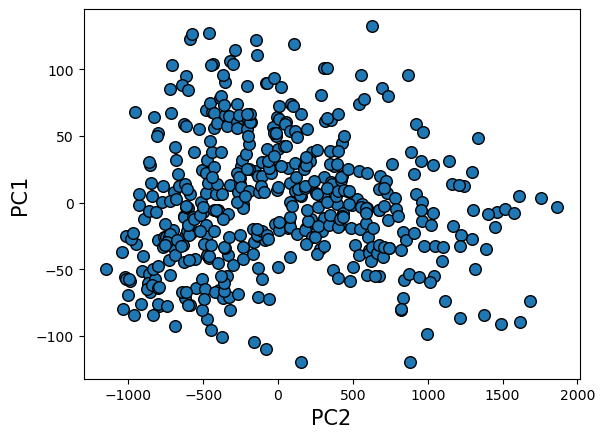

In [34]:
plt.scatter(X_pca[:,0],X_pca[:,1],edgecolor='k',s=70)


plt.ylabel('PC1',size=15)
plt.xlabel('PC2',size=15)

## Other Dimension Reduction Techniques

Another commonly used dimension reduction technique is t-SNE (t-Distributed Stochastic Neighbor Embedding). Read [this](https://www.datacamp.com/tutorial/introduction-t-sne) for more information. Let's use Scikit-Learn for the implementation of t-SNE.

In [35]:
from sklearn.manifold import TSNE


In [40]:
tsne = TSNE(n_components=2,perplexity=5.0)  # Specify the number of components (usually 2 for 2D visualization)


In [41]:
X_tsne = tsne.fit_transform(X)  # X is your high-dimensional data


/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


#### Reduced dimensional representation

Text(0.5, 0.98, 'Perplexity = 5')

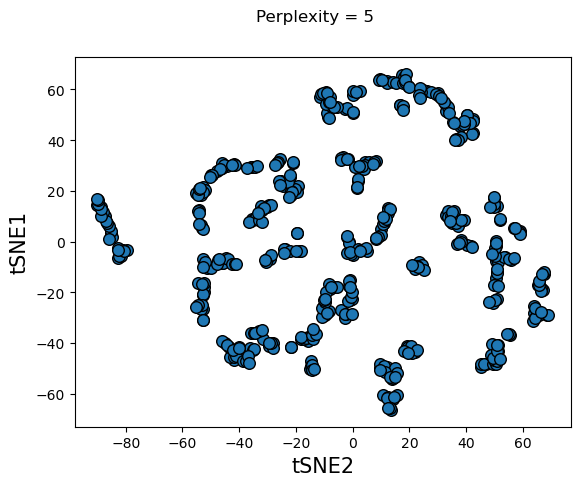

In [44]:
plt.scatter(X_tsne[:,0],X_tsne[:,1],edgecolor='k',s=70)


plt.ylabel('tSNE1',size=15)
plt.xlabel('tSNE2',size=15)
plt.suptitle("Perplexity = 5")

/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/global/cfs/cdirs/m3560/suvo/anaconda3/lib/python3.10/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


Text(0.5, 0.98, 'Perplexity = 10')

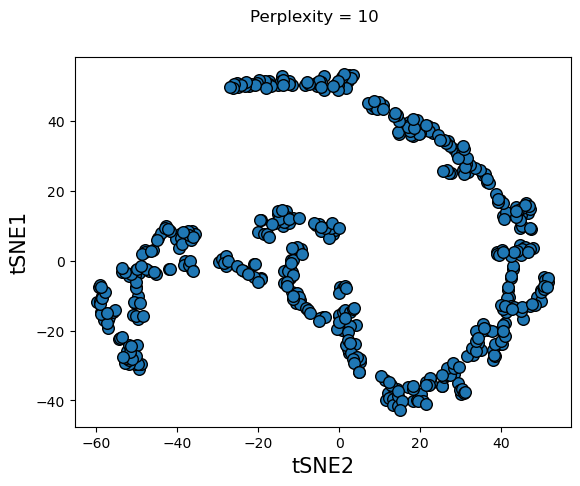

In [45]:
tsne = TSNE(n_components=2,perplexity=10.0)
X_tsne = tsne.fit_transform(X)  # X is your high-dimensional data

plt.scatter(X_tsne[:,0],X_tsne[:,1],edgecolor='k',s=70)


plt.ylabel('tSNE1',size=15)
plt.xlabel('tSNE2',size=15)
plt.suptitle("Perplexity = 10")



Perplexity is a parameter used to determine neighbors while constructing a low-dimensional manifold. t-SNE is an iterative algorithm, so the representation changes with perplexity.